# Exercise: 2 Handwriting_Recognition_Answers

In the course you learned how to do classification using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:

1.It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger

2.When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"

3.If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it?

In [18]:
import tensorflow as tf
# YOUR CODE SHOULD START HERE
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.1):
      print("\nloss is so low so cancelling training!")
      self.model.stop_training = True
# YOUR CODE SHOULD END HERE

In [19]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
callbacks = myCallback()

In [20]:
x_train.shape

(60000, 28, 28)

In [21]:
model = tf.keras.models.Sequential([
# YOUR CODE SHOULD START HERE
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
# YOUR CODE SHOULD END HERE
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [22]:
# YOUR CODE SHOULD START HERE
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])
# YOUR CODE SHOULD END HERE

Epoch 1/10
60000/60000 [==============================] - 14s 240us/sample - loss: 0.2017 - accuracy: 0.9411
Epoch 2/10
59936/60000 [============================>.] - ETA: 0s - loss: 0.0807 - accuracy: 0.9753
Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 15s 253us/sample - loss: 0.0806 - accuracy: 0.9753


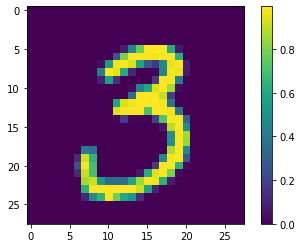

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.imshow(x_test[90])
plt.colorbar()
plt.grid(False)
plt.show()

In [24]:
import numpy as np
predictions = model.predict(x_test)
np.argmax(predictions[90])

3